Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


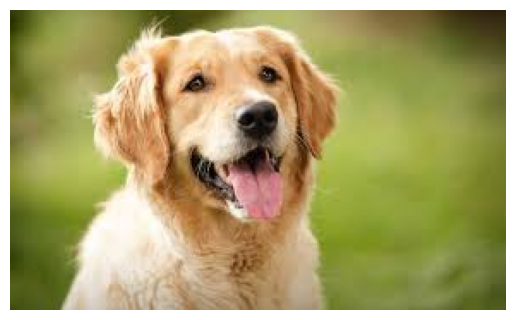

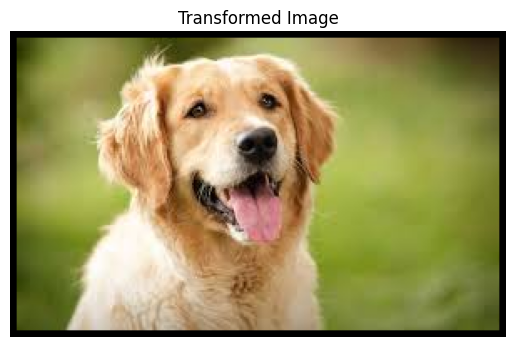

In [42]:
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image

img_path = '/content/drive/MyDrive/Colab Notebooks/picture/dog.png'

img = Image.open(img_path)

plt.imshow(img)
plt.axis('off')
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Pad(4),
    transforms.ToTensor()])

transformed_img = transform(img)
transformed_img_np = transformed_img.permute(1, 2, 0).numpy()

plt.figure()
plt.imshow(transformed_img_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

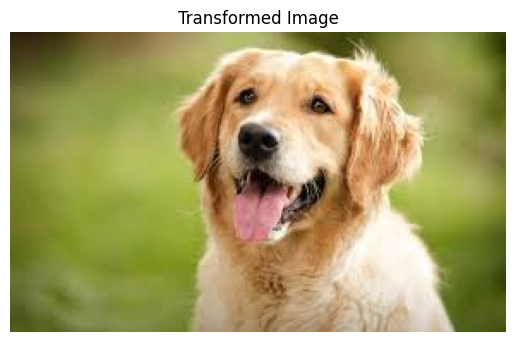

In [29]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()])

transformed_img = transform(img)
transformed_img_np = transformed_img.permute(1, 2, 0).numpy()

plt.figure()
plt.imshow(transformed_img_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

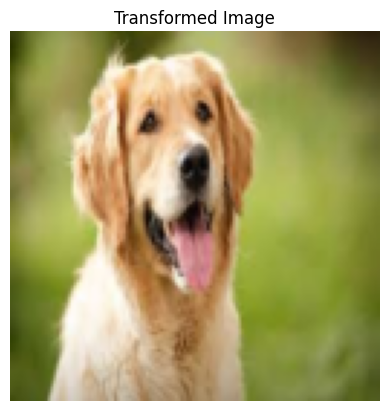

In [30]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()])

transformed_img = transform(img)
transformed_img_np = transformed_img.permute(1, 2, 0).numpy()

plt.figure()
plt.imshow(transformed_img_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

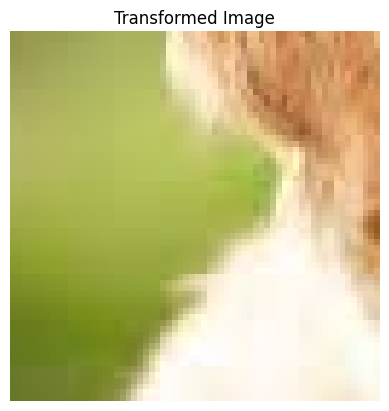

In [34]:
transform = transforms.Compose([
    transforms.RandomCrop(64), # 이미지 중심부분 자르는 CenterCrop도 있음
    transforms.ToTensor()])

transformed_img = transform(img)
transformed_img_np = transformed_img.permute(1, 2, 0).numpy()

plt.figure()
plt.imshow(transformed_img_np)
plt.title('Transformed Image')
plt.axis('off')
plt.show()

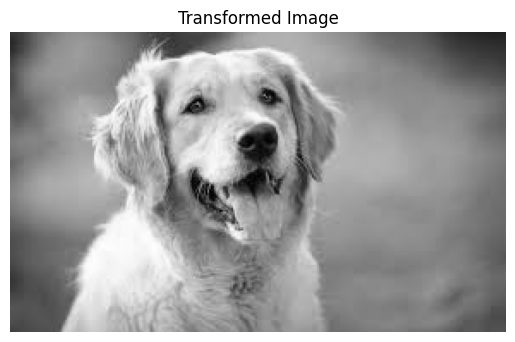

In [44]:
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()])

transformed_img = transform(img)
transformed_img_np = transformed_img.permute(1, 2, 0).numpy()

plt.figure()
plt.imshow(transformed_img_np.squeeze(), cmap='gray')
plt.title('Transformed Image')
plt.axis('off')
plt.show()

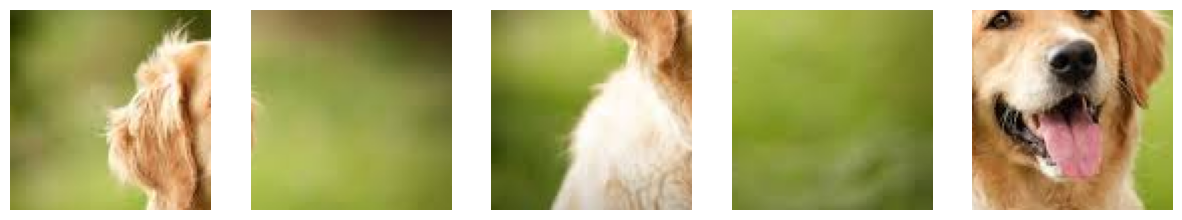

In [46]:
transform = transforms.Compose([
    transforms.FiveCrop(100),  # 5개의 크롭 이미지 반환
    transforms.Lambda(lambda crops: [transforms.ToTensor()(crop) for crop in crops])
])

transformed_imgs = transform(img)  # 5개의 텐서 형태 이미지 리스트
five_images = [img_tensor.permute(1, 2, 0).numpy() for img_tensor in transformed_imgs]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(five_images[i])
    ax.axis('off')
plt.show()

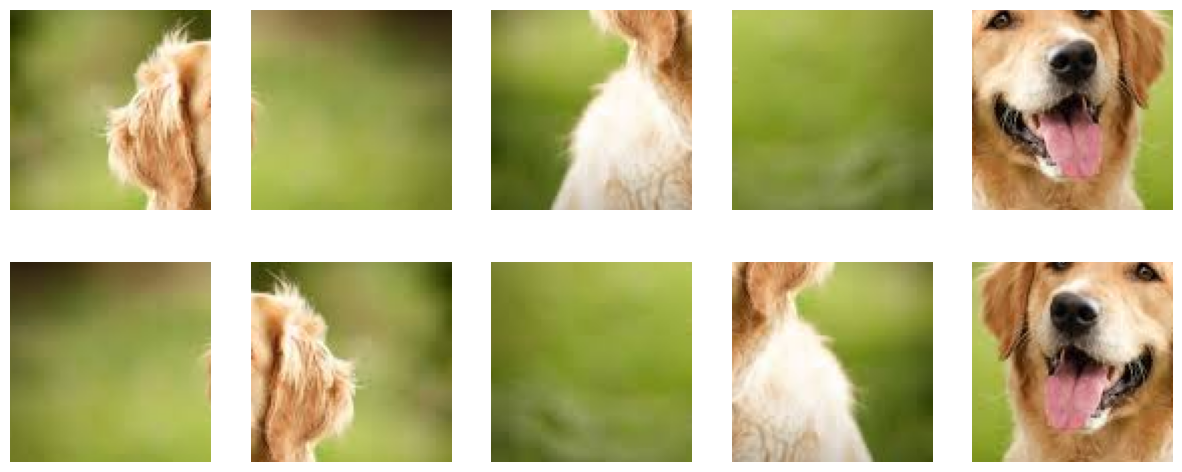

In [47]:
#TenCrop : 100x100 크기 이미지 10개 생성 (5개 + 5개 좌우반전)
transform = transforms.Compose([
    transforms.TenCrop(100),  # 10개의 크롭 이미지 반환
    transforms.Lambda(lambda crops: [transforms.ToTensor()(crop) for crop in crops])
])

transformed_imgs = transform(img)  # 10개의 텐서 형태 이미지 리스트
ten_images = [img_tensor.permute(1, 2, 0).numpy() for img_tensor in transformed_imgs]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(ten_images[i])
    ax.axis('off')
plt.show()


In [ ]:
# 추가 : 데이터 타입 변경, 정규화 기능
preprocess = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),   # 50% 확률로 좌우 반전
    transforms.RandomCrop(32, padding=4),     # 패딩 후 32x32로 랜덤 자르기
    transforms.ToDtype(torch.float32),        # torch.Tensor로 변환
    transforms.Normalize((0.5, 0.5, 0.5),     # R, G, B 각각 정규화
                         (0.5, 0.5, 0.5))
])